In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Task 1

#### a.

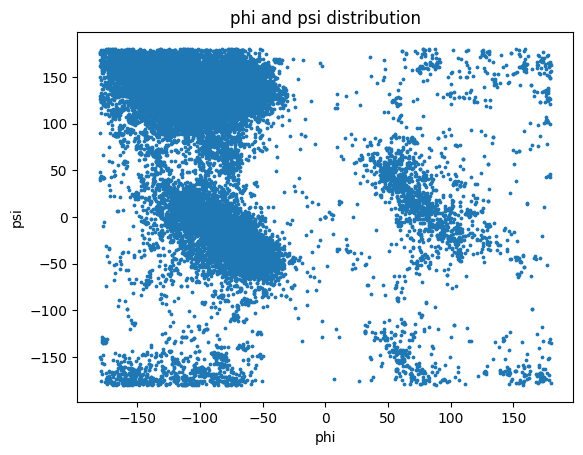

In [47]:
df = pd.read_csv('data_assignment3.csv')

# Scatter plot phi and psi values
plt.scatter(df['phi'], df['psi'], s=3)
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi and psi distribution')
plt.show()

#### b.

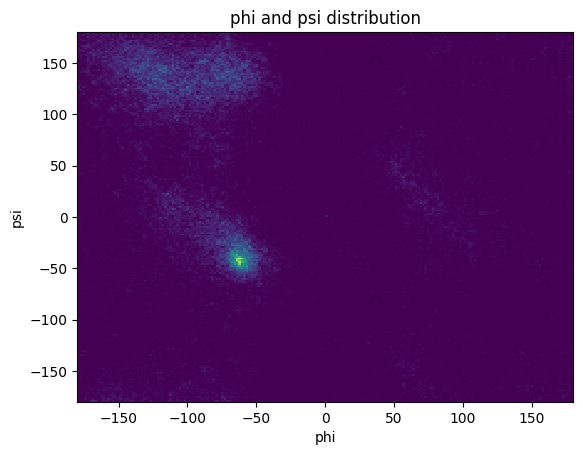

In [48]:
# Plot a 2d histogram of phi and psi values
plt.hist2d(df['phi'], df['psi'], bins=(200,200))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi and psi distribution')
plt.show()

#### c.

Since the Ramachandran plot wraps around its edges, it is necessary to apply circular statistics when analyzing the phi and psi angles. Unlike linear statistics, in which data is measured on a line, circular statistics are designed to handle data measured on a circle, where the endpoints are equivalent and the values wrap around. The circular data are used for exercise 2-4.

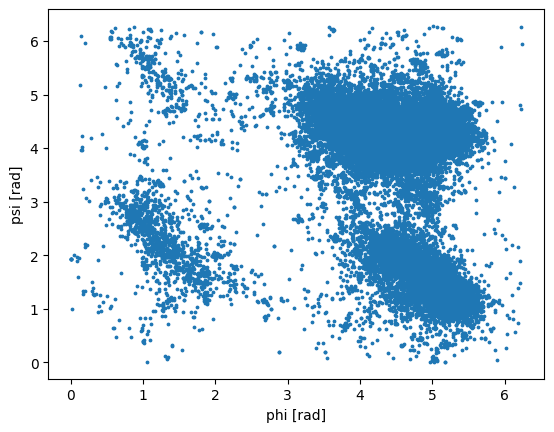

In [49]:
df['phi_wrapped'] = ((df['phi'].array) % 360) * np.pi / 180
df['psi_wrapped'] = ((df['psi'].array + 110) % 360) * np.pi / 180
X_mod = np.vstack((df['phi_wrapped'], df['psi_wrapped'])).T

# Create a scatter plot of the wrapped phi and psi angles
plt.scatter(df['phi_wrapped'], df['psi_wrapped'], s=3)

plt.xlabel('phi [rad]')
plt.ylabel('psi [rad]')

plt.show()

## Task 2

#### a.

In [50]:
from sklearn.cluster import KMeans

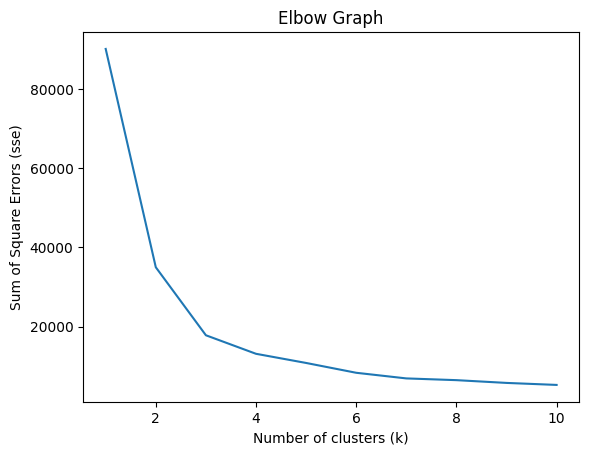

In [51]:
X = df[['phi_wrapped','psi_wrapped']].to_numpy()

# Find optimal value for k using elbow method, k_max is set to 10 as standard

def elbow_method(data, k_max=10):
    
    sse = [] # Store values for sum of squared errors (sse)
    
    # Implement kmeans clustering for different values for k and store their respective sse data
    for k in range(1,k_max+1):
        kmeans = KMeans(n_clusters=k, n_init='auto').fit(data)
        sse.append(kmeans.inertia_)
        
    # Plot the elbow graph
    plt.plot(range(1, k_max+1), sse)
    plt.title('Elbow Graph')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Square Errors (sse)')
    plt.show()

elbow_method(X)   

Using the elbow method, it looks as if ´k=3´ gives us the best amount of clusters.

[0 0 0 ... 0 1 0]


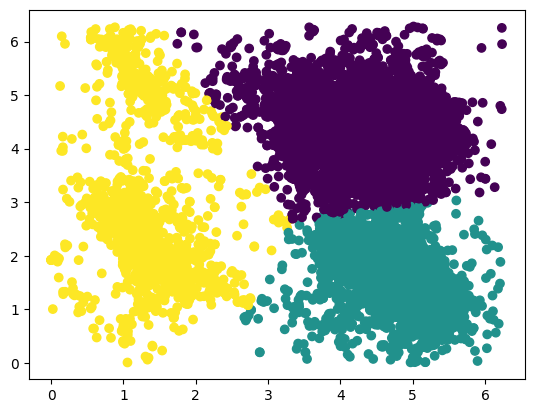

In [52]:
kmeans = KMeans(n_clusters=3, n_init=10)

label = kmeans.fit_predict(df[['phi_wrapped','psi_wrapped']])
print(label)
 
 
#Plotting the results
plt.scatter(X[:,0] , X[:,1] , c=label)
plt.show()

#### b.
These clusters aren't perfect. It's clear the clustering has done something right here, but since there is a lot of noise and the data isn't circular, it's expected that the clusters won't be perfect when using Kmeans.

## Task 3

#### a.

#### b.

In [53]:
from sklearn.cluster import DBSCAN

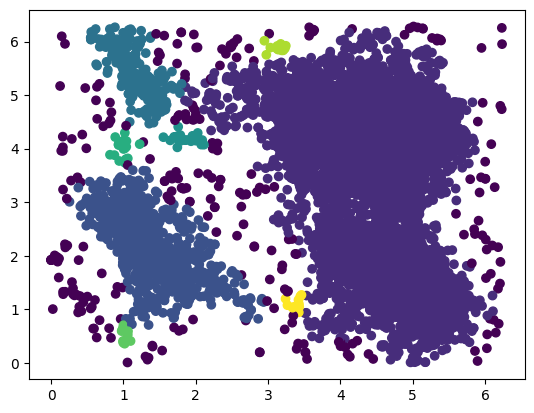

In [54]:
X = df[['phi_wrapped','psi_wrapped']].to_numpy()

dbscan = DBSCAN(eps=0.21, min_samples=13)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0] , X[:,1] , c=clusters)

#### c.

#### d.